In [2]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [3]:
#import table
customer = pd.read_csv('Data/twm_customer.csv', sep=';') #customers

In [4]:
customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [5]:
#Add USA Regions column based on state_codes
west = '|'.join(['NV','CA','HI','OR','WA','CO','AZ','NM'])
midwest = '|'.join(['IL', 'OH','IN','WI','MI','NB','MN','MO','KS'])
northeast = '|'.join(['NY','PA','NJ','MA'])
south  = '|'.join(['DC','TX','TN','VA','FL','MD','LA','KY','OK','GA','NC','AL'])
customer.loc[customer['state_code'].str.contains(west), 'Region'] = 'West'
customer.loc[customer['state_code'].str.contains(midwest), 'Region'] = 'Midwest'
customer.loc[customer['state_code'].str.contains(northeast), 'Region'] = 'Northeast'
customer.loc[customer['state_code'].str.contains(south), 'Region'] = 'South'

In [6]:
#Bin ages into new column
Age_Group = pd.cut(customer.age, bins=[10,19,29,39,49,59,69,79,89], 
                   labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89'])
customer.insert(3, 'Age_Group',Age_Group)

In [7]:
customer.Age_Group.value_counts()

10-19    139
50-59    138
30-39    131
40-49    126
60-69     82
20-29     68
70-79     37
80-89     26
Name: Age_Group, dtype: int64

In [8]:
#Bin income based on tier
income_tier = pd.cut(customer.income, bins=[0,15000, 40000, 80000,150000], 
                   labels=['Lowest','Low Middle','High Middle','Highest'])
customer.insert(2, 'Tier_income',income_tier)

In [9]:
customer.Tier_income.value_counts()

Low Middle     278
Lowest         238
High Middle    107
Highest         22
Name: Tier_income, dtype: int64

In [10]:
#Drop columns that aren't needed. ie. Noise
customer.drop('name_prefix', axis=1, inplace=True)
customer.drop('street_nbr', axis=1, inplace=True) 
customer.drop('street_name', axis=1, inplace=True) 
customer.drop('postal_code', axis=1, inplace=True)
customer.drop('city_name', axis=1, inplace=True) 

In [11]:
#New table
customer

,cust_id,income,Tier_income,age,Age_Group,years_with_bank,nbr_children,gender,marital_status,first_name,last_name,state_code,Region
0,1362691,26150,Low Middle,46,40-49,5,1,M,2,Donald ...,Marek ...,NV,West
1,1362487,6605,Lowest,71,70-79,1,0,M,2,ChingDyi ...,Moussavi ...,CA,West
2,1363160,18548,Low Middle,38,30-39,8,0,F,1,Rosa ...,Johnston ...,CA,West
3,1362752,47668,High Middle,54,50-59,3,0,F,1,Lisa ...,Martin ...,CA,West
4,1362548,44554,High Middle,59,50-59,9,2,F,4,Barbara ...,O'Malley ...,NY,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,Lowest,36,30-39,6,1,F,4,Lillian ...,Kaufman ...,CA,West
743,1362895,26387,Low Middle,56,50-59,6,1,M,2,Marty ...,McSherry ...,NY,Northeast
744,1362569,61300,High Middle,50,50-59,0,2,M,2,Ken ...,Lawrence ...,NM,West
745,1363364,15100,Low Middle,37,30-39,7,0,F,2,Debbie ...,Runner ...,AL,South


In [12]:
customer.to_csv('Data/update_customer.csv')

## Exploratory Data Analysis

In [13]:
#see basic stats
customer.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000


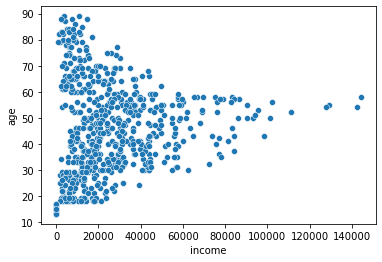

In [14]:
#scatter plot for basic relationship between income and age
sns.scatterplot(data=customer, x="income", y="age")

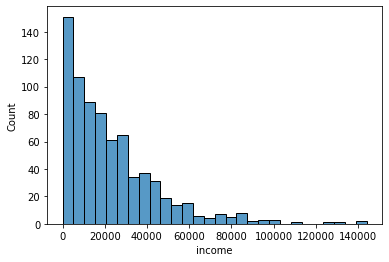

In [15]:
sns.histplot(data=customer, x='income')

In [40]:
stats.shapiro(customer['income'])

ShapiroResult(statistic=0.8469856381416321, pvalue=3.1305803275251947e-26)

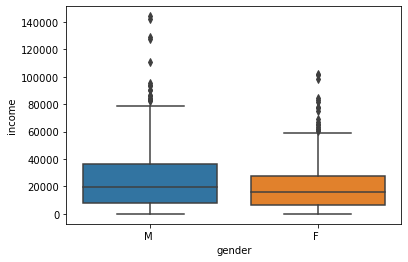

In [16]:
#Box plot comparing gender to income
sns.boxplot(x="gender", y = "income", data = customer)

In [32]:
from scipy import stats
stats.f_oneway(customer['gender'], customer['income'])

ValueError: could not convert string to float: 'M '

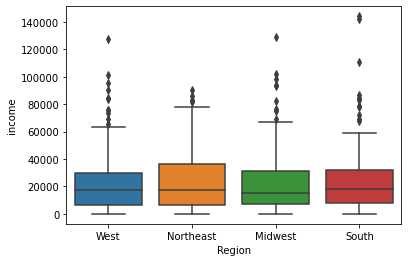

In [17]:
#Box plot comparing region to income
sns.boxplot(x="Region", y = "income", data = customer)

In [36]:
stats.ttest_rel(customer['Region'], customer['income'])

TypeError: unsupported operand type(s) for -: 'str' and 'int'

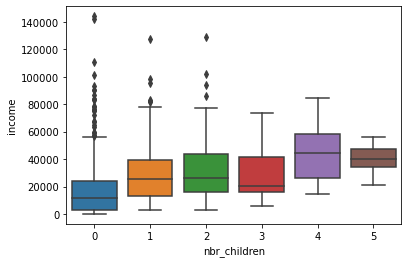

In [18]:
#Box plot comparing number of children to income
sns.boxplot(x="nbr_children", y = "income", data = customer)

In [41]:
stats.f_oneway(customer['nbr_children'], customer['income'])

F_onewayResult(statistic=782.4165371378889, pvalue=8.967369445324223e-139)

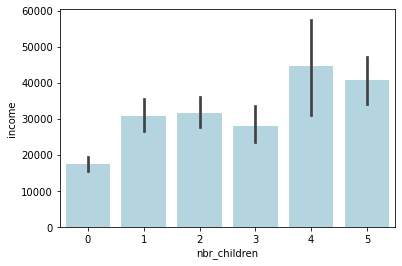

In [19]:
sns.barplot(data=customer, x= 'nbr_children', y = 'income', color='lightblue')

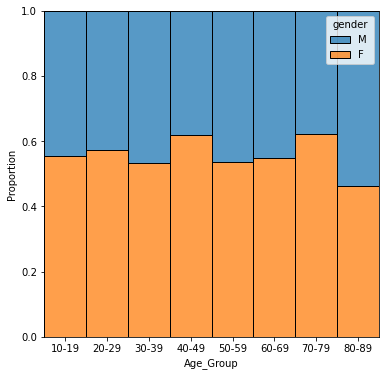

In [20]:
#Proportion of male/female per age group
plt.figure(figsize=(6,6))
groups=['M','F']
sns.histplot(data=customer, x = 'Age_Group',stat='proportion', hue='gender', multiple='fill', discrete=True, bins=groups)

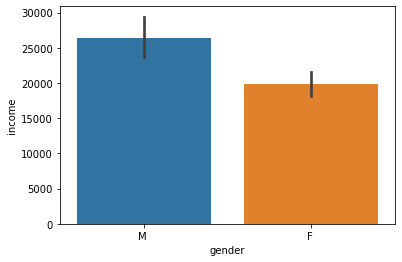

In [21]:
sns.barplot(data=customer, x= 'gender', y = 'income')

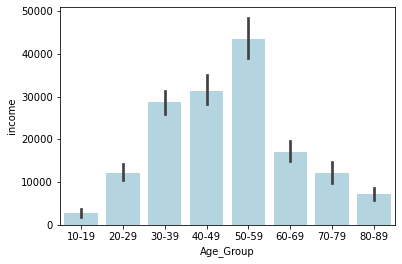

In [22]:
#Average Income vs age groups
groups=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
sns.barplot(data=customer, x= 'Age_Group', y = 'income', order=groups, color='lightblue')

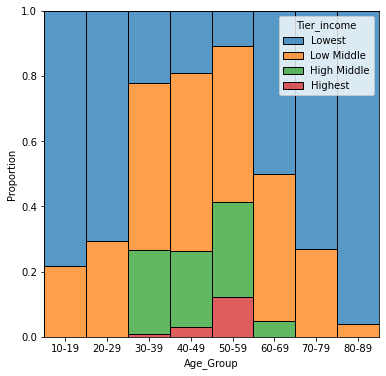

In [23]:
#Proportion of income levels per each Age Group
plt.figure(figsize=(6,6))
groups=['Lowest','Low Middle','High Middle','Highest']
sns.histplot(data=customer, x = 'Age_Group',stat='proportion', hue='Tier_income', 
             multiple='fill', discrete=True, bins=groups)

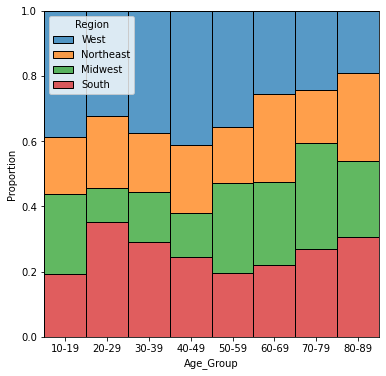

In [24]:
#Proportion of Regions per Age Group
plt.figure(figsize=(6,6))
groups=['West','Midwest', 'Northeast','South']
sns.histplot(data=customer, x = 'Age_Group',stat='proportion', hue='Region', 
             multiple='fill', discrete=True, bins=groups)

## Testing clustering

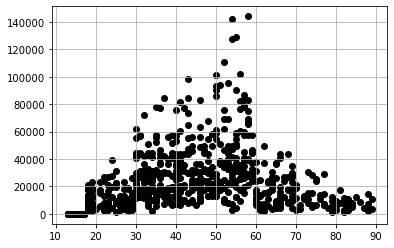

In [25]:
 mat = customer[['age','income']].values

plt.scatter(mat[:,0],
            mat[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [26]:
#define function to make cluster plots - pulled from walkthrough
def plot_clusters(X, y_res, plt_clusters_centers= False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, y, s = 50, marker = 's',
                    label = f"cluster {cluster}")
        
    if plt_clusters_centers:
        plt.scatter(X_centroids, Y_centroids, marker='*',
                    c='red', s=250, label='centroids')
    
    plt.legend()
    plt.grid()
    plt.show()

In [27]:
#define function to make distortion plot - pulled from Walkthrough
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

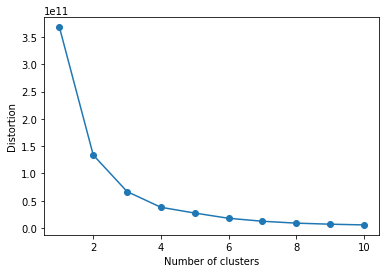

In [28]:
plot_distortion(mat, max_clusters=10)

Looks like 3 clusters at the elbow

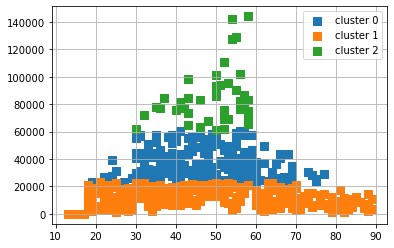

In [29]:
#first check kmeans
km = KMeans(n_clusters=3, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km)

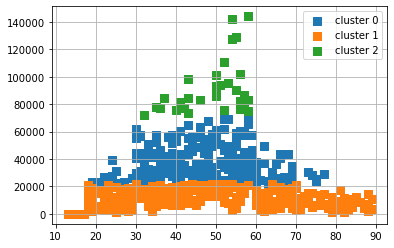

In [30]:
#check density based clustering
ac = AgglomerativeClustering(affinity = 'euclidean',
                             linkage = 'ward',
                             n_clusters = 3)
y_ac = ac.fit_predict(mat)
plot_clusters(mat, y_ac)

Clustering Type does not matter